In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn.linear_model as lm
from sklearn.model_selection import train_test_split
from sklearn import model_selection
%matplotlib inline

[-0.44437228 -1.11751514  0.83880629  0.37602058 -2.15878299  0.44964558
  0.38653843  0.39705629  0.36550272  1.27003843]
[-0.99172962 -0.88742052  0.86462215  0.55440791 -0.75813534  0.43854194
  0.20937664  0.2272231   0.2570121   1.59958079]
294 109.81025965852741 0.04153186825209055
(294,)
[0.73362772 0.63896701 0.42860986 0.35498486 0.59689558 0.57585986
 0.51275272 0.48119915 0.64948486 0.54430629]
[ 0.5693266   0.72448062  0.5319418   0.50725523  0.53204357  0.47682346
  0.32374339  0.0603598   0.85695292 -1.47491319]
294 116.31191019007956 0.043990888876732054
(294,)
[-1.17010442 -1.31735442 -1.36994371 -1.46460442  0.87035986  0.80725272
 -1.84324728 -2.29551514  0.74414558  0.70207415]
[-0.90757539 -1.33410572 -1.19629498 -1.63957604  1.01793116  0.8153047
 -0.72771291 -0.94379508  0.92851811  1.16704511]
294 110.62271572419931 0.041839151181618496
(294,)
[-1.09647942  0.70207415  0.38653843 -2.26396157 -2.35862228  0.58637772
  0.56534201  0.51275272  0.44964558  1.34366343

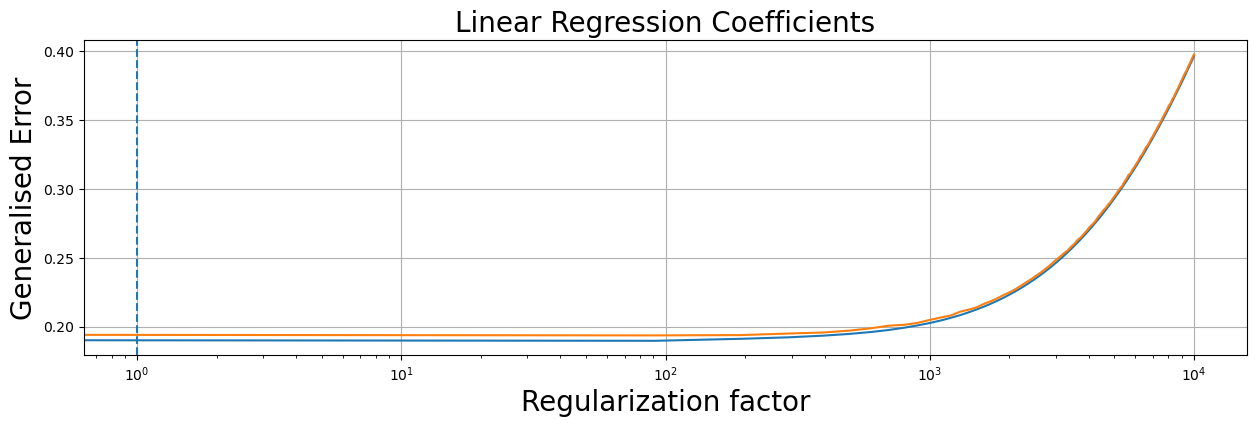

0.3749767791622657


In [33]:

data = pd.read_csv("StandardizedDataFrameWithNansFilled.csv", index_col=0)
data["Status"] = [1 if stat == "Developed" else 0 for stat in data["Status"]]
data.head()

y = data['Life expectancy '].values
y=y.T
X_drop = data.drop(columns = ['Country','Year','Life expectancy '])

# Add offset attribute
attributeNames = X_drop.columns
X_drop = np.concatenate((np.ones((X_drop.shape[0],1)),X_drop),1)
attributeNames = [u'Offset']+attributeNames
N, M = X_drop.shape
X = X_drop

# Values of lambda
lambdas = np.linspace(-10,10000,100)

# Initialize variables


Test =[]
Train =[]
for lamb in lambdas:
    ## Crossvalidation
    # Create crossvalidation partition for evaluation
    K = 10
    CV = model_selection.KFold(K, shuffle=True)

    Error_train_rlr = np.zeros((K,1))
    Error_test_rlr = np.zeros((K,1))

    w_rlr = np.empty((M,K))

    k=0
    for train_index, test_index in CV.split(X,y):
        
        # extract training and test set for current CV fold
        X_train = X[train_index]
        y_train = y[train_index]
        X_test = X[test_index]
        y_test = y[test_index]

        Xty = X_train.T @ y_train
        XtX = X_train.T @ X_train

        # Estimate weights for the value of lambda, on entire training set
        lambdaI = lamb * np.eye(M)
        lambdaI[0,0] = 0 # Do no regularize the bias term
        w_rlr[:,k] = np.linalg.solve(XtX+lambdaI,Xty).squeeze()
        # Compute mean squared error with regularization with lambda
        Error_train_rlr[k] = np.square(y_train-X_train @ w_rlr[:,k]).sum(axis=0)/y_train.shape[0]
        Error_test_rlr[k] = ((y_test-X_test @ w_rlr[:,k])**2).sum(axis=0)/y_test.shape[0]

        print(y_test[:10])
        print((X_test @ w_rlr[:,k])[:10])
        print(len((y_test-X_test @ w_rlr[:,k])**2), sum((y_test-X_test @ w_rlr[:,k])**2), sum((y_test-X_test @ w_rlr[:,k])**2)/y_train.shape[0])
        print(y_test.shape)
        k +=1

        
    Test.append(np.mean(Error_test_rlr))
    Train.append(np.mean(Error_train_rlr))

plt.figure(figsize=(15, 9))
plt.subplot(2,1,1)        
plt.semilogx(lambdas,Train) # Don't plot the bias term\
plt.semilogx(lambdas,Test) # Don't plot the bias term
plt.xlabel('Regularization factor', fontsize=20)
plt.ylabel('Generalised Error', fontsize=20)
plt.title("Linear Regression Coefficients", fontsize=20)
plt.axvline(x=1, linestyle='--')
#plt.text(10, 0.5, 'λ = 1', fontsize=12, color='black')
plt.grid()


#plt.subplots_adjust(bottom=0.35)



plt.savefig("Linear Lambda.png", bbox_inches = "tight")
plt.show()

print(Test[0])




In [10]:
print(Train)

[0.18127050460796507, 0.18131848861713878, 0.18127910618990156, 0.18130504981267725, 0.18129260509670972, 0.1813052527801948, 0.1812973937500459, 0.18131059576058456, 0.18131490412795603, 0.18133089053740997, 0.18129567233737248, 0.18126574426739, 0.18133590956204854, 0.1812994267890344, 0.18132479765082968, 0.18124524161218283, 0.18127266994982552, 0.1813101970196807, 0.18133254507314783, 0.18130778215974314, 0.18128683723306432, 0.1812561208479893, 0.18133144379272173, 0.18127853870362842, 0.1812760385910868, 0.18127663840556663, 0.18130203511933343, 0.1813132408769784, 0.18130790657954168, 0.1813120239762298, 0.18129109811474672, 0.181329502157912, 0.18132145697944219, 0.18133561535103815, 0.18130365333313894, 0.18128538929562937, 0.1812737703531602, 0.18129821756422773, 0.18133156236265596, 0.181334490908424, 0.1812938625142854, 0.18130986467503926, 0.1813294308225662, 0.18131043142895567, 0.18131169280803372, 0.18130444519973724, 0.1813389154608307, 0.18127144329095288, 0.18129070

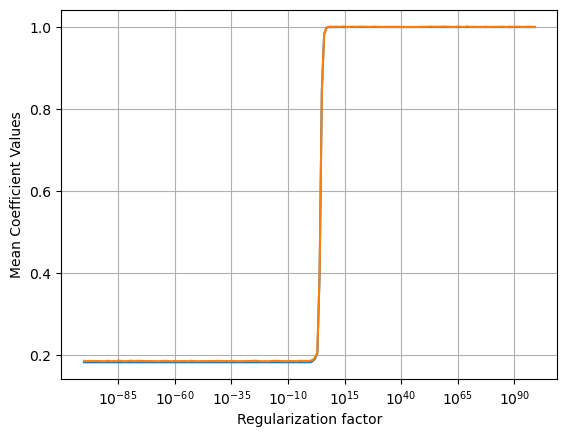

In [11]:
plt.semilogx(lambdas,Train) # Don't plot the bias term\
plt.semilogx(lambdas,Test) # Don't plot the bias term
plt.xlabel('Regularization factor')
plt.ylabel('Mean Coefficient Values')
plt.grid()

In [12]:
from automation import Tester

In [13]:
def linear_regression(X_train, X_test, y_train, y_test, lamb):
    Xty = X_train.T @ y_train
    XtX = X_train.T @ X_train

    # Estimate weights for the value of lambda, on entire training set
    N, M = X_train.shape
    lambdaI = lamb * np.eye(M)
    lambdaI[0,0] = 0 # Do no regularize the bias term
    W = np.linalg.solve(XtX+lambdaI,Xty).squeeze()
    # Compute mean squared error with regularization with lambda
    Error_test = ((y_test-X_test @ W)**2).sum(axis=0)/y_test.shape[0]
    # Whatever you want
    MSE = Error_test
    return [MSE.tolist()]




In [14]:
lambdas = np.power(10.,range(-100,100))
errors = {}
for lamb in lambdas:
    path = '/Users/william/Documents/University/civil engineering year 4/Semester 1 DTU/Introduction to machine learning/DTU_MachineLearning/Project2/StandardizedDataFrameWithNansFilled.csv'
    tester = Tester('LifeExpectancyRegression', path_to_data=path, function_to_test=linear_regression, final_test=False, k = 10, function_variable = lamb)
    errors[lamb] =tester.error

TypeError: Tester.__init__() got an unexpected keyword argument 'function_variable'

[tensor(0.2050, dtype=torch.float64), tensor(0.2050, dtype=torch.float64), tensor(0.2050, dtype=torch.float64), tensor(0.2050, dtype=torch.float64), tensor(0.2050, dtype=torch.float64), tensor(0.2050, dtype=torch.float64), tensor(0.2050, dtype=torch.float64), tensor(0.2050, dtype=torch.float64), tensor(0.2050, dtype=torch.float64), tensor(0.2050, dtype=torch.float64), tensor(0.2050, dtype=torch.float64), tensor(0.2050, dtype=torch.float64), tensor(0.2050, dtype=torch.float64), tensor(0.2050, dtype=torch.float64), tensor(0.2050, dtype=torch.float64), tensor(0.2050, dtype=torch.float64), tensor(0.2050, dtype=torch.float64), tensor(0.2050, dtype=torch.float64), tensor(0.2050, dtype=torch.float64), tensor(0.2050, dtype=torch.float64), tensor(0.2050, dtype=torch.float64), tensor(0.2050, dtype=torch.float64), tensor(0.2050, dtype=torch.float64), tensor(0.2050, dtype=torch.float64), tensor(0.2050, dtype=torch.float64), tensor(0.2050, dtype=torch.float64), tensor(0.2050, dtype=torch.float64), 

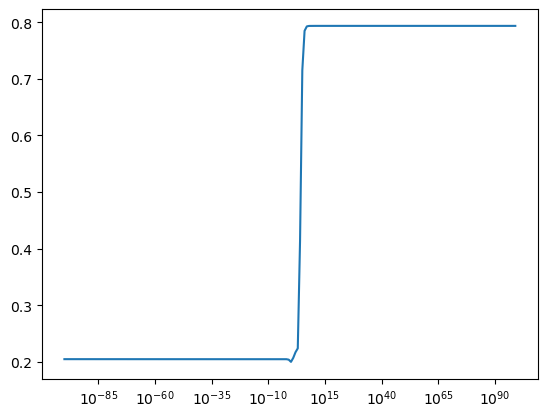

In [ ]:
errors

plt.semilogx(lambdas,errors.values())

print(list(errors.values()))

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
oplambda = min(errors, key = lambda k:errors[k])
oplambda

1.0

In [ ]:
Wav = []
def linear_regression(X_train, X_test, y_train, y_test, lamb):
    Xty = X_train.T @ y_train
    XtX = X_train.T @ X_train

    # Estimate weights for the value of lambda, on entire training set
    N, M = X_train.shape
    lambdaI = lamb * np.eye(M)
    lambdaI[0,0] = 0 # Do no regularize the bias term
    W = np.linalg.solve(XtX+lambdaI,Xty).squeeze()
    # Compute mean squared error with regularization with lambda
    Error_test = ((y_test-X_test @ W)**2).sum(axis=0)/y_test.shape[0]
    # Whatever you want
    Wav.append(W)
    MSE = Error_test
    return MSE, Wav

In [ ]:
lamb = oplambda
path = '/Users/william/Documents/University/civil engineering year 4/Semester 1 DTU/Introduction to machine learning/DTU_MachineLearning/Project2/StandardizedDataFrameWithNansFilled.csv'
tester = Tester('LifeExpectancyRegression', path_to_data=path, function_to_test=linear_regression, final_test=True, k = 10, function_variable = lamb)
errors[lamb] = tester.error

tester.results

Training and testing...: 100%|██████████| 10/10 [00:00<00:00, 627.39it/s]


TypeError: unsupported operand type(s) for +: 'int' and 'tuple'

In [ ]:
list([1, 2, 3])

[1, 2, 3]